<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Спрогнозируем, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Чтобы проект стал успешным, доведём метрику до 0.59. Проверим *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

# Цели и задачи проекта

**Цели:**

Провести исследование с целью прогнозирования ухода клиентов из «Бета-Банка» в ближайшее время.

Результаты исследования позволят маркетологам сохранить текущих клиентов, т.к. это дешевле, чем привлекать новых.

**Задачи:**

1. Загрузим и подготовим данные. Поясним порядок действий.
2. Исследуем баланс классов, обучим модель без учёта дисбаланса. Кратко опишем выводы.
3. Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдём лучшую. Кратко опишем выводы.
4. Проведём финальное тестирование.

В ходе проведения исследования нам необходимо проверить несколько гипотез:

- Гипотеза 1: самый высокий результат предсказания метрики F1-мера на валидационной выборке будет давать модель случайного леса;
- Гипотеза 2: значение метрики F1-мера наилучшей модели больше 0.59;
- Гипотеза 3: значение метрики AUC-ROC повышается с ростом значения F1-меры;
- Гипотеза 4: лучшая модель чаще ошибается, прогнозируя клиентов, которые ушли из банка.

# Описание данных

Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Данные находятся в файле `/datasets/Churn.csv` (англ. «отток клиентов»).

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки:**
- *RowNumber* — индекс строки в данных
- *CustomerId* — уникальный идентификатор клиента
- *Surname* — фамилия
- *CreditScore* — кредитный рейтинг
- *Geography* — страна проживания
- *Gender* — пол
- *Age* — возраст
- *Tenure* — сколько лет человек является клиентом банка
- *Balance* — баланс на счёте
- *NumOfProducts* — количество продуктов банка, используемых клиентом
- *HasCrCard* — наличие кредитной карты
- *IsActiveMember* — активность клиента
- *EstimatedSalary* — предполагаемая зарплата

**Целевой признак:**
- *Exited* — факт ухода клиента

# План работы

1. Подготовка данных
2. Исследование задачи
3. Борьба с дисбалансом
4. Тестирование модели
5. Общий вывод

## Подготовка данных

**Задание 1. Загрузим и подготовим данные. Поясним порядок действий.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, recall_score
from sklearn.metrics import precision_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

In [2]:
# Выведем размеры и первые 10 строк датасета:
data = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Мои проекты/GitHubRepositories/'
                 'YandexPracticum/7_project_work_supervised_learning_customer_outflow/Churn.csv')
data.shape

(10000, 14)

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
# Выведем общую информацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски присутствуют только в столбце *'Tenure'*. Заменим их на подходящие данные.

In [5]:
# Проверим явные дубликаты в датафрейме:

data.duplicated().sum()

0

In [6]:
# Выведем числовое описание данных в столбце Tenure, применив метод describe():
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

Мы видим, что значения среднего и медианы в столбце *'Tenure'* практически не отличаются друг от друга:
- mean = 4.997690
- 50% = 5.000000

Попробуем три способа подготовки данных в столбце *'Tenure'*:
1. заменим пропуски в столбце *'Tenure'* на среднее значение,
2. заменим пропуски в столбце *'Tenure'* на медиану,
3. удалим пропуски в столбце *'Tenure'*.

Сравним полученные значения средних и медиан.

In [7]:
# 1. Заменим пропуски в столбце 'Tenure' на среднее значение:
tenure_mean = data['Tenure'].fillna(data['Tenure'].mean())
tenure_mean.describe()

count    10000.00000
mean         4.99769
std          2.76001
min          0.00000
25%          3.00000
50%          4.99769
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64

In [8]:
# 2. Заменим пропуски в столбце 'Tenure' на медиану:
tenure_median = data['Tenure'].fillna(data['Tenure'].median())
tenure_median.describe()

count    10000.00000
mean         4.99790
std          2.76001
min          0.00000
25%          3.00000
50%          5.00000
75%          7.00000
max         10.00000
Name: Tenure, dtype: float64

In [9]:
# 3. Удалим пропуски в столбце Tenure:
tenure_drop = data['Tenure'].dropna().reset_index(drop=True)
tenure_drop.describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

1. Заполнение пропусков в столбце *Tenure* случайными числами.

*Tenure* — сколько лет человек является клиентом банка

In [10]:
# Выведем описание столбца 'Tenure':
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

Здесь:

min = 0 - минимальное количество лет, в течение которых человек является клиентом банка,

max = 10 - максимальное количество лет, в течение которых человек является клиентом банка.

In [11]:
# Выведем значения столбца 'Tenure' и его размер до заполнения пропусков случайными числами:

print(data['Tenure'].value_counts().sort_values(ascending=False))
print("Размер столбца 'Tenure':", data['Tenure'].value_counts().sum())

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64
Размер столбца 'Tenure': 9091


In [12]:
# Выведем значения столбца 'Tenure' и его размер после заполнения пропусков случайными числами:
# функция randint генерирует целые случайные величины от 0 до 10. 

# Запишем в отдельную переменную tenure_rand результат заполнения пропусков случайными числами:
tenure_rand = data['Tenure'].fillna(randint(0, 10))

print(tenure_rand.value_counts().sort_values(ascending=False))
print("Размер столбца 'Tenure':", tenure_rand.value_counts().sum())

2.0     1859
1.0      952
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64
Размер столбца 'Tenure': 10000


2. Так как значений в столбце *Tenure* ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменить тип данных столбца *Tenure* на object и применить технику OHE.

Категоризировать числовой показатель некорректно.

3. Заменим пропуски в столбце 'Tenure' на "0", считая, что это новые клиенты.

In [13]:
tenure_zero = data['Tenure'].fillna(0)

print(tenure_zero.value_counts().sort_values(ascending=False))
print("Размер столбца 'Tenure':", tenure_zero.value_counts().sum())

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64
Размер столбца 'Tenure': 10000


In [14]:
# Выведем количество пропусков в столбце 'Tenure':

data['Tenure'].isna().sum()

909

1. Если использовать переменную tenure_rand, то значения метрик и гиперпараметров моделей будут меняться при каждом запуске кода проекта вслед за изменениями в распределении классов внутри столбца *Tenure*.

2. Категоризировать числовой показатель некорректно.

3. Количество пропусков в столбце *Tenure* (909) значительно превышает количество в нём нулей (382). Поэтому заменять пропуски на "0" некорректно.

Итак: заменим пропуски в столбце 'Tenure' на медиану.

In [15]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Удалим из датасета столбцы, данные которых не влияют на целевой признак *'Exited'* (факт ухода клиента):
- *'RowNumber'* — индекс строки в данных,
- *'CustomerId'* — уникальный идентификатор клиента,
- *'Surname'* — фамилия.

In [16]:
# Выведем оптимизированный датасет:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Для подготовки данных необходимо преобразовать категориальные признаки в численные и масштабировать численные признаки.

Выведем состав классов категориальных признаков в датасете (столбцы 'Geography' и 'Gender').

In [17]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [18]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
# Преобразуем категориальные признаки в численные 
# с помощью техники прямого кодирования (One-Hot Encoding, OHE).
# Для этого применим к данным функцию pd.get_dummies() так, 
# чтобы избежать дамми-ловушки (применим аргумент drop_first=True):
data_ohe = pd.get_dummies(data, drop_first=True, columns=['Geography', 'Gender'])
data_ohe.shape

(10000, 12)

In [20]:
# Выведем оптимизированный датасет:
data_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


In [21]:
# Выделим из датасета по отдельности целевой признак target (столбец 'Exited') и оставшиеся признаки features:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

In [22]:
# Разделим исходные данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.
# Для корректного разбиения датасета применим аргумент stratify.

# Разделим полученые данные на промежуточную (train_valid) и тестовую выборки (20%):
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify=target)

# Разделим промежуточную выборку (train_valid) на обучающую и валидационную 
# (25% от промежуточной выборки = 20% от исходного датасета):
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.25, 
    random_state=12345, stratify=target_train_valid)

In [23]:
# Масштабируем численные признаки. Для этого стандартизируем данные с помощью структуры StandardScaler.
# В переменной numeric сохраним список всех численных признаков.

# добавим эту строку, чтобы не появлялось предупреждение 'SettingWithCopy':
pd.options.mode.chained_assignment = None 

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# создадим объект структуры StandardScaler:
scaler = StandardScaler()
# настроим объект на обучающих данных (настройка — это вычисление среднего и дисперсии):
scaler.fit(features_train[numeric]) 
# преобразуем обучающую выборку функцией transform(), 
# (т.е. нормируем значения признаков - все значения становятся в диапазоне от 0 до 1):
features_train[numeric] = scaler.transform(features_train[numeric])  
                                                                    
# преобразуем валидационную выборку функцией transform():
features_valid[numeric] = scaler.transform(features_valid[numeric])
# преобразуем тестовую выборку функцией transform():
features_test[numeric] = scaler.transform(features_test[numeric])  

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


Итак, данные подготовлены для исследования задачи.

## Исследование задачи

**Задание 2. Исследуем баланс классов, обучим модель без учёта дисбаланса. Кратко опишем выводы.**

In [24]:
# Датасет data_ohe не сбалансирован в таргете (столбец 'Exited'):
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) почти в 4 раза меньше чем оставшихся в банке.

Исследуем качество разных моделей, меняя гиперпараметры. Т.к. в таргете только два класса объектов ("0" и "1"), то решается задача бинарной классификации.

**1. Модель дерева решений для задачи классификации при дисбалансе классов**

In [25]:
%%time
# С помощью команды %%time можно вывести время, затраченное на выполнение ячейки.


# Обучим модели дерева решений для задачи классификации с различными значениями глубины от 1 до 10.
# А также для последующего построения графиков зависимости значений F1-меры модели 
# от глубины дерева max_depth на обучающей и валидационной выборках создадим следующие списки:
# list_depth_dt - с глубиной дерева max_depth, 
# list_f1_train_dt - с F1-мерой модели на обучающей выборке,
# list_f1_valid_dt - с F1-мерой модели на валидационной выборке
# (окончание _dt - сокращение от 'decision tree').

# Настроим гиперпараметры модели 'дерево решений' и сделаем цикл для max_depth от 1 до 10 с шагом 1:
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
best_auc_roc_dt = 0
list_depth_dt = []
list_f1_train_dt = []
list_f1_valid_dt = []
for depth in range(1, 11, 1):
    # создадим модель 'дерево решений' model_dt, 
    # указав максимально допустимую глубину дерева max_depth=depth:
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train) # обучим модель на обучающей выборке
        
    # получим предсказания модели на обучающей выборке:
    predictions_train_dt = pd.Series(
        model_dt.predict(features_train))
    # рассчитаем F1-меру для модели дерева решений на обучающей выборке:
    f1_train_dt = f1_score(
        target_train, predictions_train_dt)    
    
    # получим предсказания модели на валидационной выборке:
    predictions_valid_dt = pd.Series(
        model_dt.predict(features_valid))
    # рассчитаем F1-меру для модели дерева решений на валидационной выборке:
    f1_valid_dt = f1_score(
        target_valid, predictions_valid_dt)     
    
    # список с глубиной дерева max_depth:
    list_depth_dt.append(depth) 
    # список с F1-мерой модели на обучающей выборке:
    list_f1_train_dt.append(f1_train_dt)
    # список с F1-мерой модели на валидационной выборке:
    list_f1_valid_dt.append(f1_valid_dt)    
    
    # для модели дерева решений найдём значения вероятностей классов на валидационной выборке:
    probabilities_valid_dt = model_dt.predict_proba(features_valid)
    # в переменной probabilities_one_valid_dt сохраним значения вероятностей класса «1»:
    probabilities_one_valid_dt = probabilities_valid_dt[:, 1]
    # посчитаем AUC-ROC для модели дерева решений:
    auc_roc_valid_dt = roc_auc_score(target_valid, probabilities_one_valid_dt)
    
    if f1_valid_dt > best_f1_dt:
        # сохраним наилучшую модель:
        best_model_dt = model_dt
        # сохраним наилучшее значение max_depth для валидационной выборки:
        best_depth_dt = depth 
        # сохраним наилучшее значение F1-меры для валидационной выборки:
        best_f1_dt = f1_valid_dt
        # сохраним наилучшее значение AUC-ROC для валидационной выборки:
        best_auc_roc_dt = auc_roc_valid_dt
            
print('Наилучшая модель "дерево решений" для валидационной выборки:', best_model_dt)
print('Глубина дерева наилучшей модели "дерево решений" для валидационной выборки:', best_depth_dt)
print('F1-мера наилучшей модели "дерево решений" для валидационной выборки:', best_f1_dt)
print('AUC-ROC наилучшей модели "дерево решений" для валидационной выборки:', best_auc_roc_dt)

Наилучшая модель "дерево решений" для валидационной выборки: DecisionTreeClassifier(max_depth=8, random_state=12345)
Глубина дерева наилучшей модели "дерево решений" для валидационной выборки: 8
F1-мера наилучшей модели "дерево решений" для валидационной выборки: 0.5816618911174785
AUC-ROC наилучшей модели "дерево решений" для валидационной выборки: 0.8097265215909283
CPU times: total: 188 ms
Wall time: 193 ms


Наилучшая модель "дерево решений" на валидационной выборке имеет F1-меру = 0.5816618911174785 и AUC-ROC = 0.8097265215909283 при глубине дерева depth = 8.

Построим график зависимости F1-меры модели "дерево решений" от глубины дерева на обучающей и валидационной выборках.

Для наглядности сначала выведем полученные списки list_depth_dt, list_f1_train_dt и list_f1_valid_dt.

In [26]:
# Выведем полученные списки list_depth_dt, list_f1_train_dt и list_f1_valid_dt.

# Список с глубиной дерева max_depth:
list_depth_dt

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
# Список с F1-мерой модели на обучающей выборке:
list_f1_train_dt

[0.0,
 0.510659395141299,
 0.42576687116564416,
 0.5267712276906437,
 0.5067290813341135,
 0.5807814149947202,
 0.6091422701592193,
 0.6676286676286677,
 0.7066096053257253,
 0.7365356622998543]

In [28]:
# Список с F1-мерой модели на валидационной выборке:
list_f1_valid_dt

[0.0,
 0.514792899408284,
 0.375,
 0.5168539325842697,
 0.46315789473684216,
 0.5382165605095541,
 0.5505443234836704,
 0.5816618911174785,
 0.5770308123249299,
 0.5329512893982808]

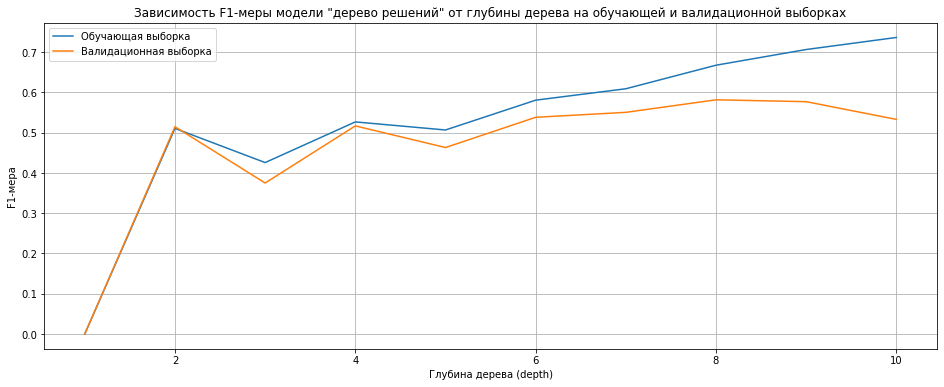

In [29]:
# Построим график зависимости F1-меры модели "дерево решений" 
# от глубины дерева на обучающей и валидационной выборках:

plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(list_depth_dt, list_f1_train_dt)
plt.plot(list_depth_dt, list_f1_valid_dt)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('Глубина дерева (depth)')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры модели "дерево решений" \
от глубины дерева на обучающей и валидационной выборках')
plt.show()

На графике видно, что переобучение наступает при глубине дерева более max_depth=6.

**2. Модель случайного леса для задачи классификации при дисбалансе классов**

In [30]:
%%time

# Обучим модель случайного леса для задачи классификации с различными значениями глубины от 1 до 10 
# с шагом 1 и количеством деревьев в диапазоне, подобранном опытным путём.
# (окончание _rf - сокращение от 'random forest'):

# Настроим гиперпараметры модели 'случайный лес' и сделаем цикл для n_estimators и max_depth:
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
best_auc_roc_rf = 0
for est in range(23, 27, 1):
    for depth in range (7, 11, 1):
        # создадим модель 'случайный лес' с заданным количеством деревьев и глубиной дерева,
        # добавив взвешивание классов (параметр class_weight='balanced'):
        model_rf = RandomForestClassifier(
            class_weight='balanced', max_depth=depth, n_estimators=est, random_state=12345)
        # обучим модель на обучающей выборке:
        model_rf.fit(features_train, target_train)
        
        # получим предсказания модели на валидационной выборке:
        predictions_valid_rf = pd.Series(
            model_rf.predict(features_valid))
        # рассчитаем F1-меру для модели случайного леса на валидационной выборке:
        f1_valid_rf = f1_score(
            target_valid, predictions_valid_rf)
        
        # для модели случайного леса найдём значения вероятностей классов на валидационной выборке:
        probabilities_valid_rf = model_rf.predict_proba(features_valid)
        # в переменной probabilities_one_valid_rf сохраним значения вероятностей класса «1»:
        probabilities_one_valid_rf = probabilities_valid_rf[:, 1]
        # посчитаем AUC-ROC для модели случайного леса:
        auc_roc_valid_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)        
                        
        if f1_valid_rf > best_f1_rf:
            # сохраним наилучшую модель:
            best_model_rf = model_rf
            # сохраним наилучшее значение n_estimators для валидационной выборки:
            best_est_rf = est 
            # сохраним наилучшее значение max_depth для валидационной выборки:
            best_depth_rf = depth
            # сохраним наилучшее значение F1-меры для валидационной выборки:
            best_f1_rf = f1_valid_rf
            # сохраним наилучшее значение AUC-ROC для валидационной выборки:
            best_auc_roc_rf = auc_roc_valid_rf

print('Наилучшая модель "случайный лес" для валидационной выборки:', best_model_rf)
print('Количество деревьев наилучшей модели "случайный лес" для валидационной выборки:', best_est_rf)
print('Глубина дерева наилучшей модели "случайный лес" для валидационной выборки:', best_depth_rf)
print('F1-мера наилучшей модели "случайный лес" для валидационной выборки:', best_f1_rf)
print('AUC-ROC наилучшей модели "случайный лес" для валидационной выборки:', best_auc_roc_rf)

Наилучшая модель "случайный лес" для валидационной выборки: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=25,
                       random_state=12345)
Количество деревьев наилучшей модели "случайный лес" для валидационной выборки: 25
Глубина дерева наилучшей модели "случайный лес" для валидационной выборки: 10
F1-мера наилучшей модели "случайный лес" для валидационной выборки: 0.6242496998799519
AUC-ROC наилучшей модели "случайный лес" для валидационной выборки: 0.8612618782110308
CPU times: total: 1.81 s
Wall time: 1.82 s


Наилучшая модель "случайный лес" на валидационной выборке имеет F1-меру = 0.6242496998799519 и AUC-ROC = 0.8612618782110308 при количестве деревьев est = 25 и глубине дерева depth = 10.

F1-мера модели "случайный лес" на валидационной выборке незначительно выше, чем у модели "дерево решений".

**Модель случайного леса для задачи классификации при дисбалансе классов, полученная с использованием функционала GridSearchCV.**

Для выведения лучшей модели 'случайный лес', а также её гиперпараметров, F1-меры и площади под ROC-кривой AUC-ROC можно также использовать функционал GridSearchCV.

In [31]:
%%time

# GridSearchCV применяется на промежуточной выборке (train_valid),
# оставшейся после выделения из исходных данных тестовой выборки test (20%).

# Создадим модель 'случайный лес' rf:
rf = RandomForestClassifier(random_state=12345)

# Отдельно создадим словарь с гиперпараметрами n_estimators и max_depth, подобранными опытным путём:
parameters = {'n_estimators': range (65, 69, 1),
              'max_depth': range (12, 16, 1)} 
                                          
# Создадим модель model_rf_grid при помощи функционала GridSearchCV с кроссвалидацией cv = 5,
# в scoring указываем метрики, которые нам необходимо расчитать - 'f1' и 'roc_auc',
# а в refit указываем метрику, по которой будут сравниваться модели - 'f1' (она выводится в best_score_):

model_rf_grid = GridSearchCV(rf, parameters, cv=5, scoring=['f1', 'roc_auc'], refit='f1')
# Обучим модель model_grid на обучающей выборке:
model_rf_grid.fit(features_train_valid, target_train_valid)

CPU times: total: 31.6 s
Wall time: 32.3 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'max_depth': range(12, 16),
                         'n_estimators': range(65, 69)},
             refit='f1', scoring=['f1', 'roc_auc'])

In [32]:
# Наилучшая модель 'случайный лес':
best_model_rf_grid = model_rf_grid.best_estimator_ 
best_model_rf_grid

RandomForestClassifier(max_depth=14, n_estimators=66, random_state=12345)

In [33]:
# Глубина дерева и количество деревьев наилучшей модели 'случайный лес':
best_depth_est_rf_grid = model_rf_grid.best_params_ 
best_depth_est_rf_grid

{'max_depth': 14, 'n_estimators': 66}

In [34]:
# F1-мера наилучшей модели 'случайный лес':
best_f1_rf_grid = model_rf_grid.best_score_ 
best_f1_rf_grid

0.5712397963768487

In [35]:
# Площадь под ROC-кривой AUC-ROC наилучшей модели 'случайный лес' можно получить из словаря cv_results_
# при помощи нахождения среднего значения в списке с ключом 'mean_test_roc_auc': 
best_auc_roc_rf_grid = model_rf_grid.cv_results_['mean_test_roc_auc'].mean()
best_auc_roc_rf_grid

0.8506175750739182

При использовании функционала GridSearchCV наилучшая модель "случайный лес" имеет F1-меру = 0.5712397963768487 и AUC-ROC = 0.8506175750739182 при количестве деревьев est = 66 и глубине дерева depth = 14.

**3. Модель логистической регрессии для задачи классификации при дисбалансе классов**

In [36]:
%%time

# Классифицируем валидационные данные с помощью модели 'логистическая регрессия'
# (окончание _lr - сокращение от 'logistic regression'):

model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model_lr.fit(features_train, target_train) 

# получим предсказания модели на валидационной выборке:
predictions_valid_lr = pd.Series(model_lr.predict(features_valid))
# рассчитаем F1-меру для модели логистической регрессии на валидационной выборке:
f1_valid_lr = f1_score(target_valid, predictions_valid_lr)

# для модели логистической регрессии найдём значения вероятностей классов на валидационной выборке:
probabilities_valid_lr = model_lr.predict_proba(features_valid)
# в переменной probabilities_one_valid_lr сохраним значения вероятностей класса «1»:
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]
# посчитаем AUC-ROC для модели логистической регрессии:
auc_roc_valid_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

print("F1-мера модели 'логистическая регрессия' на валидационной выборке:", f1_valid_lr)
print("AUC-ROC модели 'логистическая регрессия' на валидационной выборке:", auc_roc_valid_lr)

F1-мера модели 'логистическая регрессия' на валидационной выборке: 0.3214953271028037
AUC-ROC модели 'логистическая регрессия' на валидационной выборке: 0.7875656858707706
CPU times: total: 46.9 ms
Wall time: 27.1 ms


F1-мера модели "логистическая регрессия" на валидационной выборке равна 0.3214953271028037, что существенно ниже, чем у моделей "дерево решений" и "случайный лес". AUC-ROC = 0.7875656858707706 и отличается мало.

Итак, на валидационной выборке по метрике F1-мера лидирует модель "случайный лес" с циклом `for`.

**4. Отобразим в таблице *table* метрики F1-мера и AUC-ROC, полученные всеми моделями на валидационной выборке при дисбалансе классов.**

In [37]:
table = pd.DataFrame(
    [['dt', best_f1_dt, best_auc_roc_dt],
     ['rf', best_f1_rf, best_auc_roc_rf],
     ['rf_grid', best_f1_rf_grid, best_auc_roc_rf_grid],
     ['lr', f1_valid_lr, auc_roc_valid_lr]],
columns=['model', 'f1_valid', 'auc-roc_valid'])

print('F1-мера и AUC-ROC для всех моделей при дисбалансе классов')
table

F1-мера и AUC-ROC для всех моделей при дисбалансе классов


,model,f1_valid,auc-roc_valid
0,dt,0.581662,0.809727
1,rf,0.624250,0.861262
2,rf_grid,0.571240,0.850618
3,lr,0.321495,0.787566


Из таблицы наглядно видно, что при несбалансированном таргете только для одной модели случайного леса с циклом `for` F1-мера = 0.624250, что превышает заданный порог 0.59.

**5. Рассчитаем матрицу ошибок для модели случайного леса при дисбалансе классов**

In [38]:
# 1. Выведем баланс классов в таргете на обучающей выборке:
target_train.value_counts()

0    4777
1    1223
Name: Exited, dtype: int64

In [39]:
# Рассчитаем матрицу ошибок для модели случайного леса с циклом `for` на обучающей выборке:
predictions_train_rf = pd.Series(model_rf.predict(features_train))
confusion_matrix(target_train, predictions_train_rf)

array([[4467,  310],
       [ 202, 1021]], dtype=int64)

In [40]:
# 2. Выведем баланс классов в таргете на валидационной выборке:
target_valid.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [41]:
# Рассчитаем матрицу ошибок для модели случайного леса с циклом `for` на валидационной выборке:
predictions_valid_rf = pd.Series(model_rf.predict(features_valid))
confusion_matrix(target_valid, predictions_valid_rf)

array([[1430,  163],
       [ 150,  257]], dtype=int64)

Очевидно, что на валидационной выборке при дисбалансе классов модель случайного леса с циклом `for` часто видит отрицательные ответы там, где их нет: ложноотрицательные ответы составляют 37% от общего количества положительных ответов:

FN / P.

Т.е. модель случайного леса 37% положительных ответов на валидационной выборке видит как отрицательные (150 / (257 + 150)). 

*Поясним обозначения:*

- *True Positive, TP - истинно положительные ответы в правом нижнем углу матрицы,*
- *False Positive, FP - ложноположительные ответы в правом верхнем углу,*
- *True Negative, TN - истинно отрицательные ответы в левом верхнем углу,*
- *False Negative, FN - ложноотрицательные ответы в левом нижнем углу,*
- *P = TP + FN - общее количество положительных ответов (объекты класса "1"),*
- *N = FP + TN - общее количество отрицательных ответов (объекты класса "0").*

При этом доля ошибок в определении объектов отрицательного класса составляет только 10% от общего количества отрицательных ответов:

FP / N.

Т.е. модель случайного леса 10% отрицательных ответов на валидационной выборке видит как положительные (163 / (1430 + 163)). 

Отсюда можно сделать вывод, что модель случайного леса с циклом `for` при дисбалансе классов в 3 раза лучше прогнозирует объекты отрицательного класса (10% ошибок против 37%), а значит эта модель не является адекватной.

## Борьба с дисбалансом

**Задание 3. Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдём лучшую. Кратко опишем выводы.**

Проделаем те же самые действия, что и в задании 2, но при этом улучшим качество моделей при помощи:
- **взвешивания классов** - добавление в модели параметра `class_weight='balanced'`, 
- **увеличения обучающей выборки засчёт объектов положительного класса в таргете** - применение техники `upsampling`,
- **уменьшения обучающей выборки засчёт объектов отрицательного класса в таргете** - применение техники `downsampling`.

Сэмплировать допустимо только обучающую выборку. Поэтому мы не можем здесь использовать функционал GridSearchCV для построения модели случайного леса, т.к. GridSearchCV использует промежуточную выборку (train_valid), которую сам делит на обучающую и валидационную.

Напомним, что состав классов в таргете показывает, что количество ушедших клиентов (положительных ответов) почти в 4 раза меньше чем оставшихся в банке (отрицательных ответов).

In [42]:
# Датасет data_ohe не сбалансирован в таргете (столбец 'Exited'):
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

В связи с этим, увеличим количество объектов положительного класса в 2 раза, и, одновременно, уменьшим количество объектов отрицательного класса также в 2 раза.

**Улучшим качество модели при помощи увеличения количества объектов положительного класса в таргете обучающей выборки.**

In [43]:
# Выведем первоначальные размеры признаков и таргета:

print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


In [44]:
# Напишем функцию, которая улучшает качество модели с помощью увеличения выборки.
# Для этого разделим данные на отрицательные и положительные объекты:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Продублируем объекты положительного класса и объединим их с объектами отрицательного класса:
    repeat = 2
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # Добавим перемешивание данных:
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [45]:
# Сэмплируем обучающую выборку train:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2)

print(features_train_upsampled.shape)
print(target_train_upsampled.shape)

(7223, 11)
(7223,)


**Улучшим качество модели при помощи уменьшения количества объектов отрицательного класса в сэмплированном выше таргете обучающей выборки.**

In [46]:
# Напишем функцию, которая улучшает качество модели с помощью уменьшения выборки.
# Для этого разделим данные на отрицательные и положительные объекты:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Оставим долю объектов отрицательного класса и объединим их с объектами положительного класса:
    fraction = 0.5
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
        
    # Добавим перемешивание данных:
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
        
    return features_downsampled, target_downsampled

In [47]:
# Сэмплируем обучающую выборку train_upsampled:
features_train_updownsampled, target_train_updownsampled = downsample(
    features_train_upsampled, target_train_upsampled, 0.5)

print(features_train_updownsampled.shape)
print(target_train_updownsampled.shape)

(4834, 11)
(4834,)


In [48]:
target_train_updownsampled.value_counts()

1    2446
0    2388
Name: Exited, dtype: int64

С помощью метода `value_counts()` видно, что таргет обучающей выборки стал сбалансированным.

Исследуем F1-меры разных моделей, меняя гиперпараметры, с учётом устранения дисбаланса классов (используем выборку updownsampled).

Ко всем моделям применим взвешивание классов - добавление в модели параметра `class_weight='balanced'`.

**1. Модель дерева решений для задачи классификации при сбалансированной выборке**

In [49]:
%%time
# С помощью команды %%time можно вывести время, затраченное на выполнение ячейки.


# Обучим модели дерева решений для задачи классификации с различными значениями глубины от 1 до 10.
# А также для последующего построения графиков зависимости значений F1-меры модели 
# от глубины дерева max_depth на обучающей и валидационной выборках создадим следующие списки:
# list_depth_dt_updownsampled - с глубиной дерева max_depth, 
# list_f1_train_dt_updownsampled - с F1-мерой модели на обучающей выборке,
# list_f1_valid_dt_updownsampled - с F1-мерой модели на валидационной выборке
# (окончание _dt - сокращение от 'decision tree').

# Настроим гиперпараметры модели 'дерево решений' и сделаем цикл для max_depth от 1 до 10 с шагом 1:
best_model_dt_updownsampled = None
best_depth_dt_updownsampled = 0
best_f1_dt_updownsampled = 0
best_auc_roc_dt_updownsampled = 0
list_depth_dt_updownsampled = []
list_f1_train_dt_updownsampled = []
list_f1_valid_dt_updownsampled = []
for depth in range(1, 10, 1):
    # создадим модель 'дерево решений' model_dt_updownsampled, указав максимально допустимую
    # глубину дерева max_depth=depth и добавив взвешивание классов (параметр class_weight='balanced'):
    model_dt_updownsampled = DecisionTreeClassifier(
        class_weight='balanced', max_depth=depth, random_state=12345)
    # обучим модель на обучающей выборке:
    model_dt_updownsampled.fit(features_train_updownsampled, target_train_updownsampled) 
        
    # получим предсказания модели на обучающей выборке:
    predictions_train_dt_updownsampled = pd.Series(
        model_dt_updownsampled.predict(features_train_updownsampled))
    # рассчитаем F1-меру для модели случайного леса на обучающей выборке:
    f1_train_dt_updownsampled = f1_score(
        target_train_updownsampled, predictions_train_dt_updownsampled)    
    
    # получим предсказания модели на валидационной выборке:
    predictions_valid_dt_updownsampled = pd.Series(
        model_dt_updownsampled.predict(features_valid))
    # рассчитаем F1-меру для модели случайного леса на валидационной выборке:
    f1_valid_dt_updownsampled = f1_score(
        target_valid, predictions_valid_dt_updownsampled)     
    
    # список с глубиной дерева max_depth:
    list_depth_dt_updownsampled.append(depth) 
    # список с F1-мерой модели на обучающей выборке:
    list_f1_train_dt_updownsampled.append(f1_train_dt_updownsampled)
    # список с F1-мерой модели на валидационной выборке:
    list_f1_valid_dt_updownsampled.append(f1_valid_dt_updownsampled)
    
    # для модели дерева решений найдём значения вероятностей классов на валидационной выборке:
    probabilities_valid_dt_updownsampled = model_dt_updownsampled.predict_proba(
        features_valid)
    # в переменной probabilities_one_valid_dt_updownsampled сохраним значения вероятностей класса «1»:
    probabilities_one_valid_dt_updownsampled = probabilities_valid_dt_updownsampled[:, 1]
    # посчитаем AUC-ROC для модели дерева решений:
    auc_roc_valid_dt_updownsampled = roc_auc_score(
        target_valid, probabilities_one_valid_dt_updownsampled)    
         
    if f1_valid_dt_updownsampled > best_f1_dt_updownsampled:
        # сохраним наилучшую модель:
        best_model_dt_updownsampled = model_dt_updownsampled
        # сохраним наилучшее значение max_depth для валидационной выборки:
        best_depth_dt_updownsampled = depth 
        # сохраним наилучшее значение F1-меры для валидационной выборки:
        best_f1_dt_updownsampled = f1_valid_dt_updownsampled
        # сохраним наилучшее значение AUC-ROC для валидационной выборки:
        best_auc_roc_dt_updownsampled = auc_roc_valid_dt_updownsampled
            
print('Наилучшая модель "дерево решений" для валидационной выборки:', best_model_dt_updownsampled)
print('Глубина дерева наилучшей модели "дерево решений" для валидационной выборки:', 
      best_depth_dt_updownsampled)
print('F1-мера наилучшей модели "дерево решений" для валидационной выборки:', best_f1_dt_updownsampled)
print('AUC-ROC наилучшей модели "дерево решений" для валидационной выборки:', best_auc_roc_dt_updownsampled)

Наилучшая модель "дерево решений" для валидационной выборки: DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=12345)
Глубина дерева наилучшей модели "дерево решений" для валидационной выборки: 7
F1-мера наилучшей модели "дерево решений" для валидационной выборки: 0.5683382497541789
AUC-ROC наилучшей модели "дерево решений" для валидационной выборки: 0.8156538665013242
CPU times: total: 156 ms
Wall time: 150 ms


Наилучшая модель "дерево решений" на валидационной выборке имеет F1-меру = 0.5683382497541789 и AUC-ROC = 0.8156538665013242 при глубине дерева depth = 7. Т.е. F1-мера не превышает заданный порог 0,59.

Построим график зависимости F1-меры модели "дерево решений" от глубины дерева на обучающей и валидационной выборках.

Для наглядности сначала выведем полученные списки list_depth_dt_updownsampled, list_f1_train_dt_updownsampled и list_f1_valid_dt_updownsampled.

In [50]:
# Выведем полученные списки list_depth_dt_updownsampled, 
# list_f1_train_dt_updownsampled и list_f1_valid_dt_updownsampled.

# Список с глубиной дерева max_depth:
list_depth_dt_updownsampled

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
# Список с F1-мерой модели на обучающей выборке:
list_f1_train_dt_updownsampled

[0.6973478939157566,
 0.7189292543021033,
 0.6517448856799037,
 0.749611197511664,
 0.7731897067624178,
 0.7846655791190865,
 0.79915164369035,
 0.8179342132830505,
 0.8389610389610389]

In [52]:
# Список с F1-мерой модели на валидационной выборке:
list_f1_valid_dt_updownsampled

[0.4804381846635367,
 0.4860681114551083,
 0.5159817351598174,
 0.5220883534136547,
 0.5556514236410699,
 0.558055805580558,
 0.5683382497541789,
 0.5643564356435643,
 0.5609492988133765]

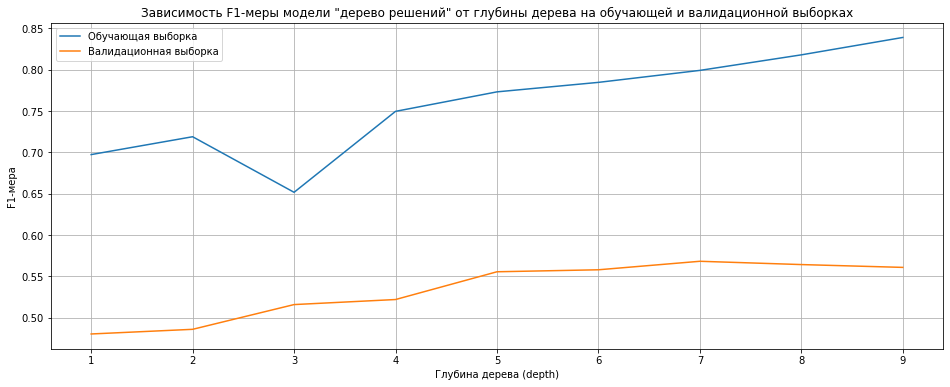

In [53]:
# Построим график зависимости F1-меры модели "дерево решений" 
# от глубины дерева на обучающей и валидационной выборках:

plt.figure(figsize=(16, 6))
plt.grid(True)
plt.plot(list_depth_dt_updownsampled, list_f1_train_dt_updownsampled)
plt.plot(list_depth_dt_updownsampled, list_f1_valid_dt_updownsampled)
plt.legend(['Обучающая выборка', 'Валидационная выборка'])
plt.xlabel('Глубина дерева (depth)')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры модели "дерево решений" \
от глубины дерева на обучающей и валидационной выборках')
plt.show()

На графике видно существенное расстояние между кривыми для обучающей и валидационной выборок. Видимо, это связано с тем, что в качестве обучающей выборки использовались сэмплированные данные, а валидационная выборка при этом осталась без изменений.

**2. Модель случайного леса для задачи классификации при сбалансированной выборке**

In [54]:
%%time

# Обучим модель случайного леса для задачи классификации с различными значениями глубины от 1 до 10 
# с шагом 1 и количеством деревьев в диапазоне, подобранном опытным путём.
# (окончание _rf - сокращение от 'random forest'):

# Настроим гиперпараметры модели 'случайный лес' и сделаем цикл для n_estimators и max_depth:
best_model_rf_updownsampled = None
best_est_rf_updownsampled = 0
best_depth_rf_updownsampled = 0
best_f1_rf_updownsampled = 0
best_auc_roc_rf_updownsampled = 0
for est in range(17, 21, 1):
    for depth in range (6, 10, 1):
        # создадим модель 'случайный лес' с заданным количеством деревьев и глубиной дерева,
        # добавив взвешивание классов (параметр class_weight='balanced'):
        model_rf_updownsampled = RandomForestClassifier(
            class_weight='balanced', max_depth=depth, n_estimators=est, random_state=12345)
        # обучим модель на обучающей выборке:
        model_rf_updownsampled.fit(features_train_updownsampled, target_train_updownsampled)
        
        # получим предсказания модели на валидационной выборке:
        predictions_valid_rf_updownsampled = pd.Series(
            model_rf_updownsampled.predict(features_valid))
        # рассчитаем F1-меру для модели случайного леса на валидационной выборке:
        f1_valid_rf_updownsampled = f1_score(
            target_valid, predictions_valid_rf_updownsampled)
        
        # для модели случайного леса найдём значения вероятностей классов на валидационной выборке:
        probabilities_valid_rf_updownsampled = model_rf_updownsampled.predict_proba(
            features_valid)
        # в переменной probabilities_one_valid_rf сохраним значения вероятностей класса «1»:
        probabilities_one_valid_rf_updownsampled = probabilities_valid_rf_updownsampled[:, 1]
        # посчитаем AUC-ROC для модели случайного леса:
        auc_roc_valid_rf_updownsampled = roc_auc_score(
            target_valid, probabilities_one_valid_rf_updownsampled)       
                        
        if f1_valid_rf_updownsampled > best_f1_rf_updownsampled:
            # сохраним наилучшую модель:
            best_model_rf_updownsampled = model_rf_updownsampled
            # сохраним наилучшее значение n_estimators для валидационной выборки:
            best_est_rf_updownsampled = est 
            # сохраним наилучшее значение max_depth для валидационной выборки:
            best_depth_rf_updownsampled = depth
            # сохраним наилучшее значение F1-меры для валидационной выборки:
            best_f1_rf_updownsampled = f1_valid_rf_updownsampled
            # сохраним наилучшее значение AUC-ROC для валидационной выборки:
            best_auc_roc_rf_updownsampled = auc_roc_valid_rf_updownsampled

print('Наилучшая модель "случайный лес" для валидационной выборки:', best_model_rf_updownsampled)
print('Количество деревьев наилучшей модели "случайный лес" для валидационной выборки:', 
      best_est_rf_updownsampled)
print('Глубина дерева наилучшей модели "случайный лес" для валидационной выборки:', 
      best_depth_rf_updownsampled)
print('F1-мера наилучшей модели "случайный лес" для валидационной выборки:', best_f1_rf_updownsampled)
print('AUC-ROC наилучшей модели "случайный лес" для валидационной выборки:', best_auc_roc_rf_updownsampled)

Наилучшая модель "случайный лес" для валидационной выборки: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=20,
                       random_state=12345)
Количество деревьев наилучшей модели "случайный лес" для валидационной выборки: 20
Глубина дерева наилучшей модели "случайный лес" для валидационной выборки: 9
F1-мера наилучшей модели "случайный лес" для валидационной выборки: 0.6219008264462809
AUC-ROC наилучшей модели "случайный лес" для валидационной выборки: 0.863462846513694
CPU times: total: 1.25 s
Wall time: 1.24 s


Наилучшая модель "случайный лес" на валидационной выборке имеет F1-меру = 0.6243386243386244 и AUC-ROC = 0.8622574809015486 при количестве деревьев est = 20 и глубине дерева depth = 10. Т.е. F1-мера превышает заданный порог 0,59.

**3. Модель логистической регрессии для задачи классификации при сбалансированной выборке.**

In [55]:
%%time

# Классифицируем валидационные данные с помощью модели 'логистическая регрессия', 
# обавив взвешивание классов (параметр class_weight='balanced')
# (окончание _lr - сокращение от 'logistic regression'):

model_lr_updownsampled = LogisticRegression(
    class_weight='balanced', random_state=12345, solver='lbfgs', max_iter=1000) 
model_lr_updownsampled.fit(features_train, target_train) 

# получим предсказания модели на валидационной выборке:
predictions_valid_lr_updownsampled = pd.Series(model_lr_updownsampled.predict(features_valid))
# рассчитаем F1-меру для модели логистической регрессии на валидационной выборке:
f1_valid_lr_updownsampled = f1_score(target_valid, predictions_valid_lr_updownsampled)

# для модели логистической регрессии найдём значения вероятностей классов на валидационной выборке:
probabilities_valid_lr_updownsampled = model_lr_updownsampled.predict_proba(features_valid)
# в переменной probabilities_one_valid_lr_updownsampled сохраним значения вероятностей класса «1»:
probabilities_one_valid_lr_updownsampled = probabilities_valid_lr_updownsampled[:, 1]
# посчитаем AUC-ROC для модели логистической регрессии:
auc_roc_valid_lr_updownsampled = roc_auc_score(
    target_valid, probabilities_one_valid_lr_updownsampled)

print("F1-мера модели 'логистическая регрессия' на валидационной выборке:", f1_valid_lr_updownsampled)
print("AUC-ROC модели 'логистическая регрессия' на валидационной выборке:", auc_roc_valid_lr_updownsampled)

F1-мера модели 'логистическая регрессия' на валидационной выборке: 0.5113043478260869
AUC-ROC модели 'логистическая регрессия' на валидационной выборке: 0.7917902494173681
CPU times: total: 31.2 ms
Wall time: 19.8 ms


Обе метрики модели "логистическая регрессия" на валидационной выборке F1-мера = 0.5113043478260869 и AUC-ROC = 0.7917902494173681. Т.е. F1-мера не превышает заданный порог 0,59.

Итак, на валидационной выборке по метрике F1-мера лидирует модель "случайный лес".

**4. Дополним таблицу *table* метриками F1-мера и AUC-ROC, полученными всеми моделями на валидационной выборке при сбалансированной в таргете обучающей выборке.**

In [56]:
table_add1 = pd.DataFrame(
    [['dt', best_f1_dt_updownsampled, best_auc_roc_dt_updownsampled],
     ['rf', best_f1_rf_updownsampled, best_auc_roc_rf_updownsampled],
     ['rf_grid', np.NaN, np.NaN],
     ['lr', f1_valid_lr_updownsampled, auc_roc_valid_lr_updownsampled]],
columns=['model', 'f1_valid_updownsampled', 'auc-roc_valid_updownsampled'])

In [57]:
table = table.merge(table_add1, on='model', how='left')
print('F1-мера и AUC-ROC для всех моделей при несбалансированном и сбалансированном таргете в обучающей выборке')
table

F1-мера и AUC-ROC для всех моделей при несбалансированном и сбалансированном таргете в обучающей выборке


,model,f1_valid,auc-roc_valid,f1_valid_updownsampled,auc-roc_valid_updownsampled
0,dt,0.581662,0.809727,0.568338,0.815654
1,rf,0.624250,0.861262,0.621901,0.863463
2,rf_grid,0.571240,0.850618,NaN,NaN
3,lr,0.321495,0.787566,0.511304,0.791790


Из таблицы наглядно видно, что при сбалансированном таргете только для одной модели случайного леса F1-мера = 0.624339, что превышает заданный порог 0.59. При этом видно, что с ростом F1-меры растёт и площадь под ROC-кривой AUC-ROC.

**5. Рассчитаем матрицу ошибок для модели случайного леса  на валидационной выборке при сбалансированном таргете в обучающей выборке.**

In [58]:
# 1. Выведем баланс классов в таргете на обучающей выборке:
target_train.value_counts()

0    4777
1    1223
Name: Exited, dtype: int64

In [59]:
# Рассчитаем матрицу ошибок для модели случайного леса на обучающей выборке:
predictions_train_rf = pd.Series(model_rf.predict(features_train))
confusion_matrix(target_train, predictions_train_rf)

array([[4467,  310],
       [ 202, 1021]], dtype=int64)

In [60]:
# 2. Выведем баланс классов в таргете на валидационной выборке:
target_valid.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [61]:
# Рассчитаем матрицу ошибок для модели случайного леса на валидационной выборке:
predictions_valid_rf_updownsampled = pd.Series(model_rf_updownsampled.predict(features_valid))
confusion_matrix(target_valid, predictions_valid_rf_updownsampled)

array([[1333,  260],
       [ 106,  301]], dtype=int64)

По сравнению с расчётом матрицы ошибок на валидационной выборке при дисбалансе классов (задание 2), в случае сбалансированной выборки модель случайного леса стала ошибаться реже при поиске объектов положительного класса: доля ложноотрицательных ответов уменьшилась и составляет 28% от общего количества положительных ответов:

FN / P.

Т.е. модель случайного леса 28% положительных ответов на валидационной выборке видит как отрицательные (114 / (293 + 114)). 

*Поясним обозначения:*

- *True Positive, TP - истинно положительные ответы в правом нижнем углу матрицы,*
- *False Positive, FP - ложноположительные ответы в правом верхнем углу,*
- *True Negative, TN - истинно отрицательные ответы в левом верхнем углу,*
- *False Negative, FN - ложноотрицательные ответы в левом нижнем углу,*
- *P = TP + FN - общее количество положительных ответов (объекты класса "1"),*
- *N = FP + TN - общее количество отрицательных ответов (объекты класса "0").*

При этом доля ошибок в определении объектов отрицательного класса выросла и составляет 16% от общего количества отрицательных ответов:

FP / N.

Т.е. модель случайного леса 16% отрицательных ответов на валидационной выборке видит как положительные (257 / (1336 + 257)). 

В целом, можно отметить, что модель стала лучше распознавать объекты положительного класса. Это говорит о том, что модель случайного леса стала более адекватной. Но, тем не менее, объекты отрицательного класса она по-прежнему распознаёт лучше, чем объекты положительного класса (16% ошибок против 28%).

## Тестирование модели

**Задание 4. Проведём финальное тестирование.**

**1. Проверим на тестовой выборке F1-меру и AUC-ROC при помощи модели случайного леса, полученной на сбалансированной в таргете обучающей выборке.**

In [62]:
# получим предсказания модели на тестовой выборке:
predictions_test_rf_updownsampled = pd.Series(
    model_rf_updownsampled.predict(features_test))
# рассчитаем F1-меру для модели случайного леса на тестовой выборке:
f1_test_rf_updownsampled = f1_score(
    target_test, predictions_test_rf_updownsampled)
        
# для модели случайного леса найдём значения вероятностей классов на тестовой выборке:
probabilities_test_rf_updownsampled = model_rf_updownsampled.predict_proba(
    features_test)
# в переменной probabilities_one_test_rf сохраним значения вероятностей класса «1»:
probabilities_one_test_rf_updownsampled = probabilities_test_rf_updownsampled[:, 1]
# посчитаем AUC-ROC для модели случайного леса:
auc_roc_test_rf_updownsampled = roc_auc_score(
    target_test, probabilities_one_test_rf_updownsampled)   

print('F1-мера наилучшей модели "случайный лес" для тестовой выборки:', f1_test_rf_updownsampled)
print('AUC-ROC наилучшей модели "случайный лес" для тестовой выборки:', auc_roc_test_rf_updownsampled)

F1-мера наилучшей модели "случайный лес" для тестовой выборки: 0.6244725738396625
AUC-ROC наилучшей модели "случайный лес" для тестовой выборки: 0.8640566606668302


Наилучшая модель случайного леса на тестовой выборке имеет F1-меру = 0.6074866310160427 и AUC-ROC = 0.8602323432831908. Т.е. F1-мера превышает заданный порог 0,59.

**2. Дополним таблицу *table* метриками F1-мера и AUC-ROC, полученными моделью случайного леса на тестовой выборке при сбалансированной в таргете обучающей выборке.**

In [63]:
table_add2 = pd.DataFrame(
    [['dt', np.NaN, np.NaN],
     ['rf', f1_test_rf_updownsampled, auc_roc_test_rf_updownsampled],
     ['rf_grid', np.NaN, np.NaN],
     ['lr', np.NaN, np.NaN]],
columns=['model', 'f1_test_updownsampled', 'auc-roc_test_updownsampled'])

In [64]:
table = table.merge(table_add2, on='model', how='left')
table

,model,f1_valid,auc-roc_valid,f1_valid_updownsampled,auc-roc_valid_updownsampled,f1_test_updownsampled,auc-roc_test_updownsampled
0,dt,0.581662,0.809727,0.568338,0.815654,NaN,NaN
1,rf,0.624250,0.861262,0.621901,0.863463,0.624473,0.864057
2,rf_grid,0.571240,0.850618,NaN,NaN,NaN,NaN
3,lr,0.321495,0.787566,0.511304,0.791790,NaN,NaN


Из таблицы наглядно видно, что при тестировании модели случайного леса F1-мера = 0.607487, что, как и в случае валидационной выборки F1-мера = 0.624339, также превышает заданный порог 0.59. При этом видно, что с ростом F1-меры растёт и площадь под ROC-кривой AUC-ROC.

**3. Рассчитаем матрицу ошибок для модели случайного леса  на тестовой выборке при сбалансированном таргете в обучающей выборке.**

In [65]:
# 1. Выведем баланс классов в таргете на обучающей выборке:
target_train.value_counts()

0    4777
1    1223
Name: Exited, dtype: int64

In [66]:
# Рассчитаем матрицу ошибок для модели случайного леса на обучающей выборке:
predictions_train_rf = pd.Series(model_rf.predict(features_train))
confusion_matrix(target_train, predictions_train_rf)

array([[4467,  310],
       [ 202, 1021]], dtype=int64)

In [67]:
# 2. Выведем баланс классов в таргете на тестовой выборке:
target_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [68]:
# Рассчитаем матрицу ошибок для модели случайного леса на тестовой выборке:
predictions_test_rf_updownsampled = pd.Series(model_rf_updownsampled.predict(features_test))
confusion_matrix(target_test, predictions_test_rf_updownsampled)

array([[1348,  245],
       [ 111,  296]], dtype=int64)

При сбалансированном таргете в обучающей выборке матрица ошибок модели случайного леса показывает схожий результат на валидационной и тесовой выборках.

**4. Построим ROC-кривую для модели случайного леса на тестовой выборке при сбалансированной в таргете обучающей выборке.**

Для построения ROC-кривой необходимо на графике отобразить по горизонтали характеристику FPR, а по вертикали - TPR. 

При этом:
- TPR = TP / P, где P = TP + FN,
- FPR = FP / N, где N = FP + TN,

где
- True Positive Rate, TPR - доля верно предсказанных объектов к общему числу объектов класса (recall, "полнота"), 
- False Positive Rate, FPR - доля ложных срабатываний к общему числу объектов за пределами класса,
- True Positive, TP - истинно положительные ответы,
- False Positive, FP - ложноположительные ответы,
- True Negative, TN - истинно отрицательные ответы,
- False Negative, FN - ложноотрицательные ответы.

Переберём значения порога thresholds модели случайного леса и проведём кривую. Она называется ROC-кривая, или кривая ошибок (от англ. receiver operating characteristic, «характеристика работы приёмника»; термин пришёл из теории обработки сигналов).

Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели.

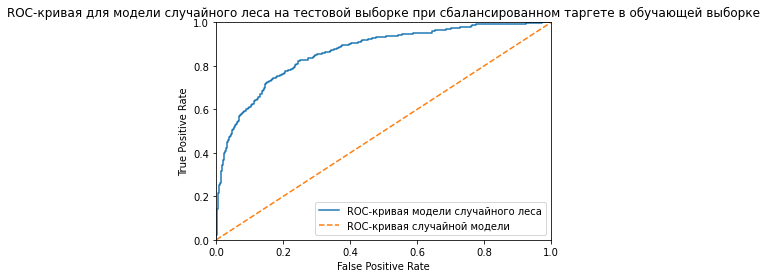

In [69]:
# Построим ROC-кривую для модели случайного леса на тестовой выборке при сбалансированном таргете в обучающей выборке: 
fpr_test_rf_updownsampled, tpr_test_rf_updownsampled, thresholds = roc_curve(
    target_test, probabilities_one_test_rf_updownsampled)

plt.figure()

# построим график:
plt.plot(fpr_test_rf_updownsampled, tpr_test_rf_updownsampled)

# ROC-кривая случайной модели (выглядит как прямая):
plt.plot([0, 1], [0, 1], linestyle='--')

# применим функции plt.xlim() и plt.ylim(), чтобы установить границы осей от 0 до 1:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# подпишем кривые:
plt.legend(['ROC-кривая модели случайного леса', 'ROC-кривая случайной модели'])

# применим функции plt.xlabel() и plt.ylabel(), чтобы подписать оси:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title():
plt.title('ROC-кривая для модели случайного леса на тестовой выборке при сбалансированном таргете в обучающей выборке')

plt.show()

На графике наглядно видно, что площадь под ROC-кривой модели случайного леса (AUC-ROC = 0.860232) превышает площадь под ROC-кривой случайной модели ( AUC-ROC = 0.5).

**5. Проверим на адекватность модель случайного леса на тестовой выборке при сбалансированной в таргете обучающей выборке.**

In [70]:
# 1. Выведем относительные частоты классов в таргете тестовой выборки (от 0 до 1):
target_test.value_counts(normalize=True)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

In [71]:
# 2. С помощью константной модели сделаем наивные прогнозы F1-меры и AUC-ROC на тестовой выборке
# при сбалансированной в таргете обучающей выборке. 
# Для создания константной модели используем классификатор DummyClassifier:

# создадим константную модель model_dummy:
model_dummy = DummyClassifier(strategy='most_frequent', random_state=12345)
# обучим модель model_dummy на обучающей выборке:
model_dummy.fit(features_train_updownsampled, target_train_updownsampled) 
# model_dummy.predict(features_test)

# получим предсказания модели на тестовой выборке:
predictions_dummy = pd.Series(model_dummy.predict(features_test))
# рассчитаем F1-меру для модели на тестовой выборке:
f1_dummy = f1_score(target_test, predictions_dummy)

# для модели случайного леса найдём значения вероятностей классов на тестовой выборке:
probabilities_dummy = model_dummy.predict_proba(features_test)
# в переменной probabilities_one_dummy сохраним значения вероятностей положительного класса «1»:
probabilities_one_dummy = probabilities_dummy[:, 1]
# посчитаем AUC-ROC для модели случайного леса:
auc_roc_dummy = roc_auc_score(target_test, probabilities_one_dummy) 

print(f'Наивный прогноз F1-меры: {f1_dummy:.2%}')
print(f'Наивный прогноз AUC-ROC: {auc_roc_dummy:.2%}')

Наивный прогноз F1-меры: 33.82%
Наивный прогноз AUC-ROC: 50.00%


Наивные прогнозы F1-меры = 33.82% и AUC-ROC = 50.00%, что гораздо ниже значений этих метрик, полученных моделью случайного леса на тестовой выборке при сбалансированной в таргете обучающей выборке. Поэтому модель случайного леса можно считать адекватной.

## Общий вывод

Проведено исследование с целью прогнозирования ухода клиентов из «Бета-Банка» в ближайшее время.

Входные данные – исторические данные о поведении клиентов и расторжении договоров с банком.

Результаты исследования позволят маркетологам сохранить текущих клиентов, т.к. это дешевле, чем привлекать новых.

Перед проведением исследования были сформулированы несколько гипотез:

- Гипотеза 1: самый высокий результат предсказания метрики F1-мера на валидационной выборке будет давать модель случайного леса;
- Гипотеза 2: значение метрики F1-мера наилучшей модели больше 0.59;
- Гипотеза 3: значение метрики AUC-ROC повышается с ростом значения F1-меры;
- Гипотеза 4: лучшая модель чаще ошибается, прогнозируя клиентов, которые ушли из банка.

В результате удалось выявить следующие зависимости.

<b>Гипотеза 1 подтверждена:</b>

На валидационной выборке:
- 0.568338 - F1-мера модели "дерево решений";
- 0.624339 - F1-мера модели "случайный лес";
- 0.511304 - F1-мера модели "логистическая регрессия".

Рекомендация: для улучшения работы модели случайного леса можно собрать и добавить в исследуемый датасет дополнительные данные об ушедших клиентах (т.е. добавить в датасет объекты положительного класса в таргете).

<b>Гипотеза 2 подтверждена:</b>

На валидационной выборке:
- 0.568338 - F1-мера модели "дерево решений";
- 0.624339 - F1-мера модели "случайный лес";
- 0.511304 - F1-мера модели "логистическая регрессия".

Рекомендация: для увеличения метрики F1-мера можно собрать более полные данные о том, сколько лет человек является клиентом банка (*Tenure*), либо провести более тщательную предобработку этих данных.

<b>Гипотеза 3 подтверждена:</b>

На валидационной выборке:
- 0.815654 - AUC-ROC модели "дерево решений";
- 0.862257 - AUC-ROC модели "случайный лес";
- 0.791790 - AUC-ROC модели "логистическая регрессия".

Рекомендация: для метрики AUC-ROC аналогична рекомендации для гипотезы 2.

<b>Гипотеза 4 подтверждена:</b>

Клиенты, которые остались в банке, в таргете отображаются объектами отрицательного класса.

Доля ошибок прогнозирования моделью случайного леса объектов положительного класса ("1") на валидационной и тестовой выборках при сбалансированной в таргете обучающей выборке составляет 28%. 

Доля ошибок прогнозирования моделью случайного леса объектов отрицательного класса ("0") на валидационной и тестовой выборках при сбалансированной в таргете обучающей выборке составляет 16%. 

Т.е. модель случайного леса чаще ошибается, прогнозируя объекты положительного класса (клиентов, которые ушли из банка).

Рекомендация: для улучшения предсказания модели аналогична рекомендации для гипотезы 1.


<b>Общие рекомендации:</b>

Маркетологам, которые занимаются исследованием поведения пользователей и планированием увеличения прибыли, можно использовать зависимости из всех гипотез 1, 2, 3 и 4.